# Descripción de las columnas del dataset de bombardeos de EE.UU. en Corea ✈️

## Datos generales de la misión
- **ROW_NUMBER**: 🔢 Número único de fila en el dataset (índice del registro).
- **MISSION_NUMBER**: 📋 Identificador de la misión de bombardeo.
- **OP_ORDER**: 🛠️ Código del orden operacional asociado a la misión.
- **UNIT**: 🪖 Unidad militar encargada del bombardeo (e.g., "98th Bomb Wing").
- **MISSION_DATE**: 📅 Fecha de la misión.

## Información sobre la aeronave
- **AIRCRAFT_TYPE_MDS**: ✈️ Tipo o modelo de aeronave utilizada (e.g., B-29).
- **NBR_ATTACK_EFFEC_AIRCRAFT**: ⚙️ Número de aeronaves efectivas en el ataque.
- **SORTIE_DUPE**: 🔄 Número de salidas duplicadas (operaciones repetidas).
- **NBR_ABORT_AIRCRAFT**: 🚫 Número de aeronaves que abortaron la misión.
- **NBR_LOST_AIRCRAFT**: ❌ Número de aeronaves perdidas durante la misión.

## Objetivo de la misión
- **TARGET_NAME**: 🎯 Nombre del objetivo bombardeado.
- **TGT_TYPE**: 🏗️ Tipo de objetivo (e.g., infraestructura, instalaciones militares).
- **SOURCE_UTM_JAPAN_B**: 🗺️ Sistema de referencia UTM utilizado (en Japón, datos escasos).
- **SOURCE_TGT_UTM**: 🌍 Coordenadas UTM del objetivo.
- **TGT_MGRS**: 🌐 Coordenadas del objetivo en formato MGRS (Military Grid Reference System).
- **TGT_LATITUDE_WGS84**: 📍 Latitud del objetivo (formato WGS84).
- **TGT_LONGITUDE_WGS84**: 📍 Longitud del objetivo (formato WGS84).
- **SOURCE_TGT_LAT**: 📍 Latitud del objetivo obtenida de otra fuente.
- **SOURCE_TGT_LONG**: 📍 Longitud del objetivo obtenida de otra fuente.

## Información sobre el armamento
- **NBR_OF_WEAPONS**: 💣 Número de armas utilizadas.
- **WEAPONS_TYPE**: 🧨 Tipo de armas utilizadas (e.g., bombas, cohetes).
- **BOMB_SIGHTING_METHOD**: 🎯 Método utilizado para apuntar las bombas (e.g., visual, radar).
- **TOTAL_BOMBLOAD_IN_LBS**: ⚖️ Carga total de bombas en libras.
- **NOSE_FUZE**: 🪝 Tipo de espoleta en la nariz de las bombas.
- **TAIL_FUZE**: 🪝 Tipo de espoleta en la cola de las bombas.
- **CALCULATED_BOMBLOAD_LBS**: ⚖️ Carga calculada de bombas en libras.

## Evaluación y resultados
- **TOT**: ⏰ Hora sobre el objetivo ("Time Over Target").
- **MISSION_TYPE**: 🎯 Tipo de misión (e.g., ataque estratégico, reconocimiento).
- **ALTITUDE_FT**: 📏 Altitud en pies durante el bombardeo.
- **BDA**: 🔍 Evaluación de daños del bombardeo ("Bomb Damage Assessment").

## Información adicional
- **CALLSIGN**: 📡 Indicativo de llamada del avión (datos escasos).
- **RECORD_SOURCE**: 📂 Fuente del registro (e.g., "EXETER", sistema o archivo de origen).


#
___

# IMPORTAR LIBRERIAS

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
#from googletrans import Translator
import re
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#
___

# LECTURA BASES DE DATOS

In [186]:
file_path = './data/THOR_KOREAN_EXTR_DATA.csv'
df_bombardeos = pd.read_csv(file_path, sep=',')
df_bombardeos.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,MISSION_DATE,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,...,TOTAL_BOMBLOAD_IN_LBS,TOT,MISSION_TYPE,ALTITUDE_FT,CALLSIGN,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE
0,2,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,12000.0,NaN,NaN,19750,NaN,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER
1,3,433,174-51,307th Bomb Wing,6/1/51,B-29,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.01,Non-delay,4000.0,EXETER
2,4,433,174-51,307th Bomb Wing,6/1/51,B-29,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,21000 - 22500,NaN,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER
3,5,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,16000.0,NaN,NaN,21500,NaN,NaN,0.01,Non-delay,16000.0,EXETER
4,6,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,16000.0,NaN,NaN,16000,NaN,NaN,0.01,Non-delay,16000.0,EXETER


In [187]:
file_path2 = './data/THOR_KOREAN_DATA.csv'
df_bombardeos_2 = pd.read_csv(file_path2, sep=',')
df_bombardeos_2.head() 

,KOREAN_ID,MSN_DATE,UNIT_ID,UNIT_ID_2,UNIT_ID_CODE,GROUP_OR_HIGHER_UNIT_ID,SQUADRON_ID,AIRFIELD_ID,LAUNCH_BASE,LAUNCH_COUNTRY,...,AC_LOST_TO_OTHER,AC_DAMAGED,KIA,WIA,MIA,EAC_CONFIRMED_DESTROYED,EAC_PROB_DESTROYED,TOTAL_TONS,ROCKETS,BULLETS
0,1,2/1/51,003BL,008BL,003BL008BL,NaN,3rd Bombardment Group (Light),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,10.0,74.0
1,2,6/28/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,28.0,NaN,132.0
2,3,6/28/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,28.0,NaN,132.0
3,4,6/29/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,24.0,NaN,113.0
4,5,6/29/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,24.0,NaN,113.0


In [176]:
df_bombardeos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12878 entries, 0 to 12877
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KOREAN_ID                12878 non-null  int64  
 1   MSN_DATE                 12878 non-null  object 
 2   UNIT_ID                  12822 non-null  object 
 3   UNIT_ID_2                12847 non-null  object 
 4   UNIT_ID_CODE             12875 non-null  object 
 5   GROUP_OR_HIGHER_UNIT_ID  2992 non-null   object 
 6   SQUADRON_ID              5088 non-null   object 
 7   AIRFIELD_ID              12870 non-null  object 
 8   LAUNCH_BASE              2098 non-null   object 
 9   LAUNCH_COUNTRY           2098 non-null   object 
 10  LAUNCH_LAT               0 non-null      float64
 11  LAUNCH_LONG              0 non-null      float64
 12  AC_TYPE                  12877 non-null  object 
 13  AC_DISPATCHED            12869 non-null  float64
 14  AC_EFFECTIVE          

In [123]:
df_bombardeos_2.columns

Index(['KOREAN_ID', 'MSN_DATE', 'UNIT_ID', 'UNIT_ID_2', 'UNIT_ID_CODE',
       'GROUP_OR_HIGHER_UNIT_ID', 'SQUADRON_ID', 'AIRFIELD_ID', 'LAUNCH_BASE',
       'LAUNCH_COUNTRY', 'LAUNCH_LAT', 'LAUNCH_LONG', 'AC_TYPE',
       'AC_DISPATCHED', 'AC_EFFECTIVE', 'AC_ABORT', 'AC_LOST_TO_EAC',
       'AC_LOST_TO_AAA', 'AC_LOST_TO_UNKNOWN_EA', 'AC_LOST_TO_OTHER',
       'AC_DAMAGED', 'KIA', 'WIA', 'MIA', 'EAC_CONFIRMED_DESTROYED',
       'EAC_PROB_DESTROYED', 'TOTAL_TONS', 'ROCKETS', 'BULLETS'],
      dtype='object')

In [188]:
valores_columna = df_bombardeos_2['LAUNCH_COUNTRY']

valores_unicos = df_bombardeos_2['LAUNCH_COUNTRY'].unique()
valores_unicos

array([nan, 'Okinawa', 'Japan', 'Philippines'], dtype=object)

In [189]:
valores_columna = df_bombardeos_2['LAUNCH_BASE']

valores_unicos = df_bombardeos_2['LAUNCH_BASE'].unique()
valores_unicos

array([nan, 'Kadena AFB', 'Yokota AFB', 'Clark AFB'], dtype=object)

In [150]:
df_bombardeos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   MISSION_DATE               11052 non-null  object 
 5   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 6   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 7   SORTIE_DUPE                6663 non-null   float64
 8   NBR_ABORT_AIRCRAFT         379 non-null    float64
 9   NBR_LOST_AIRCRAFT          32 non-null     object 
 10  TARGET_NAME                6036 non-null   object 
 11  TGT_TYPE                   7758 non-null   object 
 12  SOURCE_UTM_JAPAN_B         12 non-null     object 
 13  SOURCE_TGT_UTM             8564 non-null   obj

In [127]:
df_bombardeos.columns

Index(['ROW_NUMBER', 'MISSION_NUMBER', 'OP_ORDER', 'UNIT', 'MISSION_DATE',
       'AIRCRAFT_TYPE_MDS', 'NBR_ATTACK_EFFEC_AIRCRAFT', 'SORTIE_DUPE',
       'NBR_ABORT_AIRCRAFT', 'NBR_LOST_AIRCRAFT', 'TARGET_NAME', 'TGT_TYPE',
       'SOURCE_UTM_JAPAN_B', 'SOURCE_TGT_UTM', 'TGT_MGRS',
       'TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84', 'SOURCE_TGT_LAT',
       'SOURCE_TGT_LONG', 'NBR_OF_WEAPONS', 'WEAPONS_TYPE',
       'BOMB_SIGHTING_METHOD', 'TOTAL_BOMBLOAD_IN_LBS', 'TOT', 'MISSION_TYPE',
       'ALTITUDE_FT', 'CALLSIGN', 'BDA', 'NOSE_FUZE', 'TAIL_FUZE',
       'CALCULATED_BOMBLOAD_LBS', 'RECORD_SOURCE'],
      dtype='object')

In [128]:
df_bombardeos.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,MISSION_DATE,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,...,TOTAL_BOMBLOAD_IN_LBS,TOT,MISSION_TYPE,ALTITUDE_FT,CALLSIGN,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE
0,2,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,12000.0,NaN,NaN,19750,NaN,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER
1,3,433,174-51,307th Bomb Wing,6/1/51,B-29,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.01,Non-delay,4000.0,EXETER
2,4,433,174-51,307th Bomb Wing,6/1/51,B-29,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,21000 - 22500,NaN,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER
3,5,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,16000.0,NaN,NaN,21500,NaN,NaN,0.01,Non-delay,16000.0,EXETER
4,6,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,...,16000.0,NaN,NaN,16000,NaN,NaN,0.01,Non-delay,16000.0,EXETER


In [190]:
# EXTRAER DATOS DE DIA, MES Y AÑO DEL BOMBARDEO
df_bombardeos['MISSION_DATE'] = pd.to_datetime(df_bombardeos['MISSION_DATE'], format='%m/%d/%y')

# Crear nuevas columnas para día, mes y año
df_bombardeos['DAY'] = df_bombardeos['MISSION_DATE'].dt.day
df_bombardeos['MONTH'] = df_bombardeos['MISSION_DATE'].dt.month
df_bombardeos['YEAR'] = df_bombardeos['MISSION_DATE'].dt.year

In [191]:
# Corregir el año para reflejar el siglo XX
df_bombardeos['YEAR'] = df_bombardeos['YEAR'].apply(lambda x: x - 100 if x > 2000 else x)

In [193]:
df_bombardeos.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,MISSION_DATE,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,...,ALTITUDE_FT,CALLSIGN,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR
0,2,433,174-51,98th Bomb Wing,2051-06-01,B-29,1.0,NaN,NaN,NaN,...,19750,NaN,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER,1,6,1951
1,3,433,174-51,307th Bomb Wing,2051-06-01,B-29,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0.01,Non-delay,4000.0,EXETER,1,6,1951
2,4,433,174-51,307th Bomb Wing,2051-06-01,B-29,1.0,1.0,NaN,NaN,...,21000 - 22500,NaN,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER,1,6,1951
3,5,433,174-51,98th Bomb Wing,2051-06-01,B-29,1.0,NaN,NaN,NaN,...,21500,NaN,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951
4,6,433,174-51,98th Bomb Wing,2051-06-01,B-29,1.0,NaN,NaN,NaN,...,16000,NaN,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951


In [181]:
df_bombardeos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ROW_NUMBER                 11052 non-null  int64         
 1   MISSION_NUMBER             11042 non-null  object        
 2   OP_ORDER                   11043 non-null  object        
 3   UNIT                       11040 non-null  object        
 4   MISSION_DATE               11052 non-null  datetime64[ns]
 5   AIRCRAFT_TYPE_MDS          10428 non-null  object        
 6   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64       
 7   SORTIE_DUPE                6663 non-null   float64       
 8   NBR_ABORT_AIRCRAFT         379 non-null    float64       
 9   NBR_LOST_AIRCRAFT          32 non-null     object        
 10  TARGET_NAME                6036 non-null   object        
 11  TGT_TYPE                   7758 non-null   object        
 12  SOUR

In [194]:
file_path = './data/df_bombardeos_actualizado.csv'
df_bombardeos = pd.read_csv(file_path, sep=',')
df_bombardeos.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,ALTITUDE_FT,CALLSIGN,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,19750,NaN,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER,1,6,1951
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.01,Non-delay,4000.0,EXETER,1,6,1951
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,21000 - 22500,NaN,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER,1,6,1951
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,21500,NaN,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,16000,NaN,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951


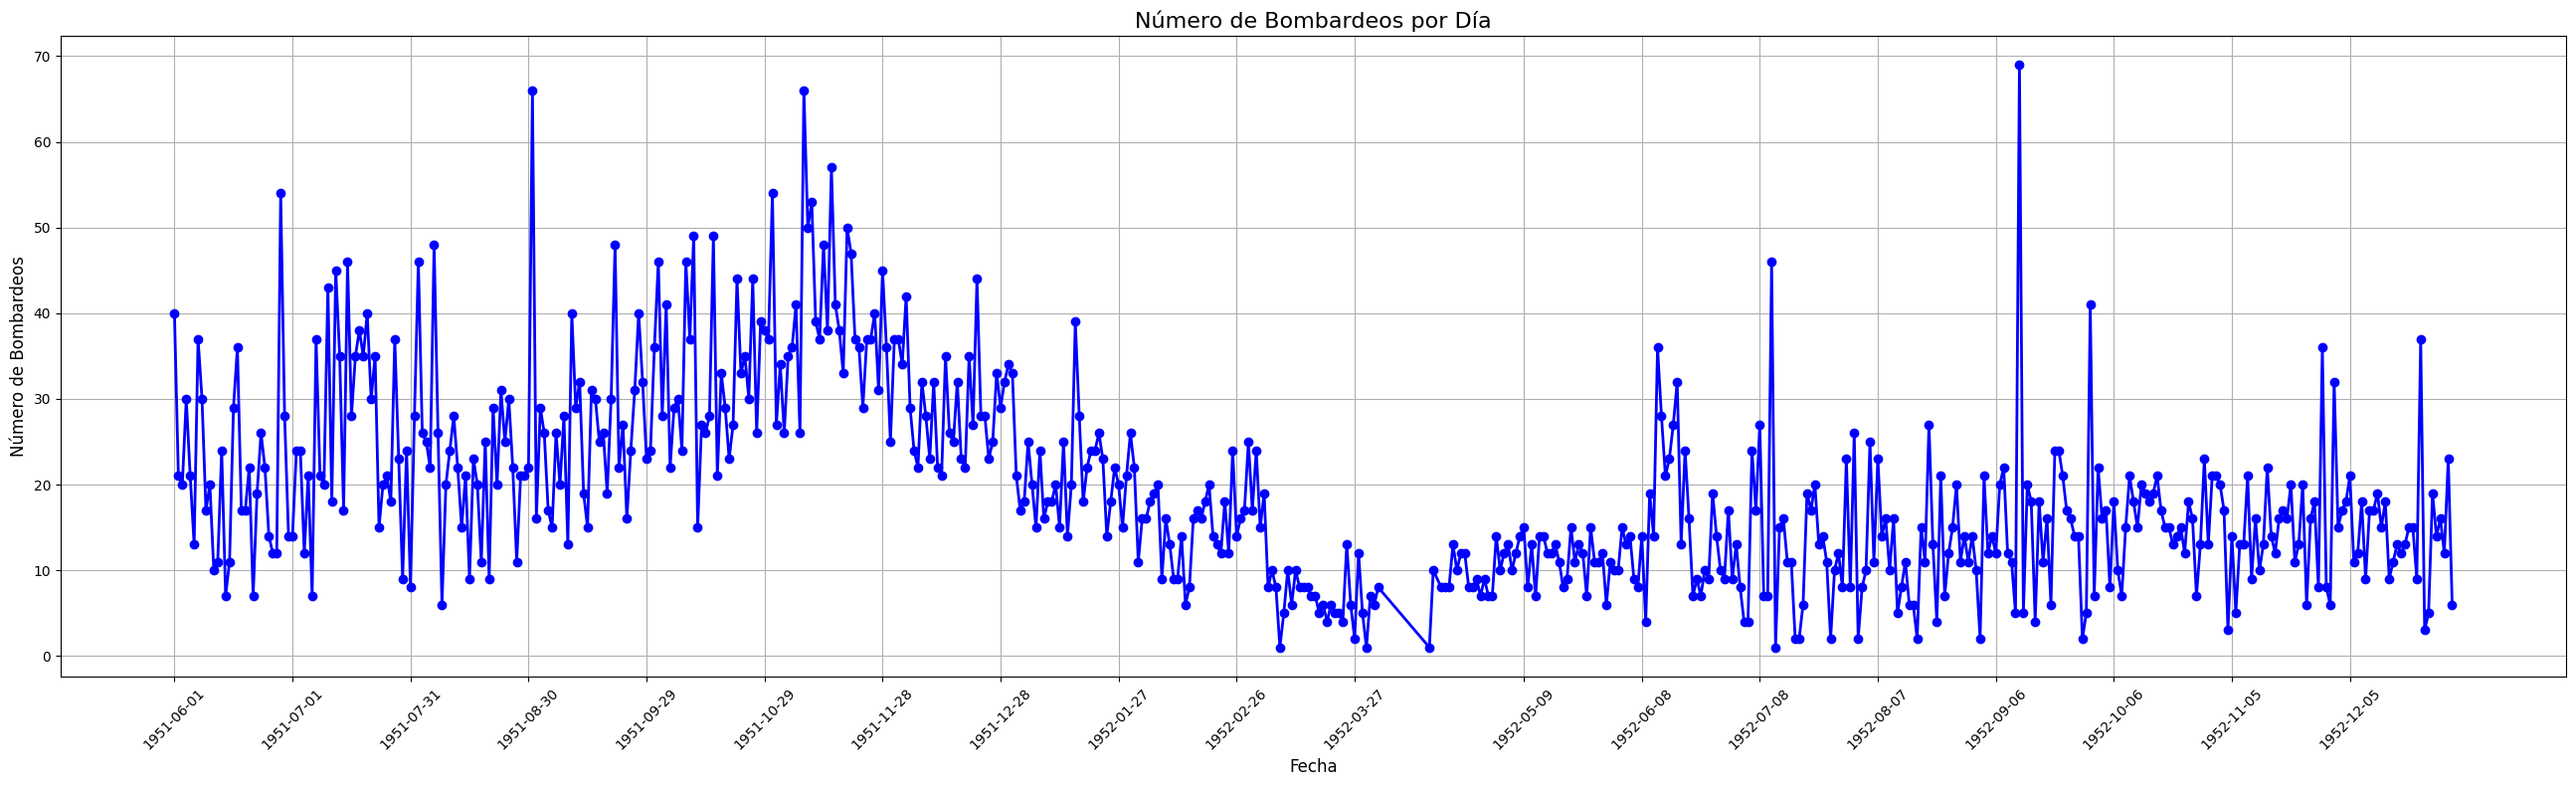

In [195]:
df_bombardeos['MISSION_DATE'] = pd.to_datetime(
    df_bombardeos[['YEAR', 'MONTH', 'DAY']],
    errors='coerce')

bombing_counts_by_date = df_bombardeos.groupby('MISSION_DATE').size()

plt.figure(figsize=(26, 8))
plt.plot(
    bombing_counts_by_date.index, 
    bombing_counts_by_date.values, 
    marker='o', linestyle='-', linewidth=2, color='blue'
)

# Configurar los ticks para que se muestren todos los meses
plt.xticks(bombing_counts_by_date.index[::30], rotation=45)  # Mostrar una etiqueta aproximadamente cada mes

# Configurar título y etiquetas de ejes
plt.title("Número de Bombardeos por Día", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Número de Bombardeos", fontsize=12)
plt.grid(True)
plt.tight_layout();

In [155]:
valores_columna = df_bombardeos['TGT_LATITUDE_WGS84']

valores_unicos = df_bombardeos['TGT_LATITUDE_WGS84'].unique()
valores_unicos.tolist()

['38.49881N',
 nan,
 '39.66879N',
 '39.60215N',
 '39.91217N',
 '38.24362N',
 '52.89048N',
 '40.77223N',
 '39.65877N',
 '38.16582N',
 '38.20858N',
 '38.20318N',
 '38.25461N',
 '38.20173N',
 '38.15706N',
 '38.18240N',
 '38.29953N',
 '38.25448N',
 '38.22268N',
 '38.16118N',
 '36.66510N',
 '38.29038N',
 '40.11406N',
 '39.68349N',
 '39.70554N',
 '39.53857N',
 '39.52939N',
 '40.72265N',
 '38.01361N',
 '38.08702N',
 '38.17484N',
 '38.07934N',
 '38.18409N',
 '38.22616N',
 '38.13879N',
 '38.27193N',
 '38.20136N',
 '38.18385N',
 '39.67750N',
 '40.79618N',
 '38.45245N',
 '38.50132N',
 '39.84011N',
 '39.54758N',
 '38.09821N',
 '38.10910N',
 '38.20017N',
 '38.39237N',
 '38.20837N',
 '38.26555N',
 '38.26321N',
 '38.57547N',
 '38.12569N',
 '38.17545N',
 '38.28164N',
 '38.51032N',
 '39.53840N',
 '38.09396N',
 '38.19176N',
 '38.20248N',
 '38.25920N',
 '38.19723N',
 '38.17445N',
 '38.21062N',
 '38.21037N',
 '38.30812N',
 '38.19347N',
 '38.17782N',
 '38.21377N',
 '38.13422N',
 '38.20134N',
 '39.90272N',


In [156]:
valores_columna = df_bombardeos['TGT_LONGITUDE_WGS84']

valores_unicos = df_bombardeos['TGT_LONGITUDE_WGS84'].unique()
valores_unicos.tolist()

[' 127.66974E',
 nan,
 ' 125.50653E',
 ' 125.66717E',
 ' 127.56091E',
 ' 126.41753E',
 ' 126.55293E',
 ' 125.61128E',
 ' 125.55279E',
 ' 127.71006E',
 ' 126.92125E',
 ' 127.83503E',
 ' 126.97708E',
 ' 127.04706E',
 ' 127.73304E',
 ' 127.58418E',
 ' 127.58190E',
 ' 127.58278E',
 ' 127.99466E',
 ' 128.20096E',
 ' 128.22789E',
 ' 127.57065E',
 ' 126.26600E',
 ' 125.22724E',
 ' 125.00633E',
 ' 127.25447E',
 ' 127.24307E',
 ' 126.48985E',
 ' 126.61924E',
 ' 126.68527E',
 ' 127.70990E',
 ' 126.75391E',
 ' 127.73257E',
 ' 127.48051E',
 ' 127.71054E',
 ' 127.53671E',
 ' 127.66375E',
 ' 127.70974E',
 ' 125.06382E',
 ' 126.55820E',
 ' 125.89926E',
 ' 125.74071E',
 ' 127.56241E',
 ' 127.25425E',
 ' 126.79895E',
 ' 126.90126E',
 ' 126.95575E',
 ' 127.13354E',
 ' 126.90984E',
 ' 127.76545E',
 ' 127.55975E',
 ' 127.32395E',
 ' 127.37992E',
 ' 127.09342E',
 ' 127.59368E',
 ' 125.74105E',
 ' 127.24284E',
 ' 126.58243E',
 ' 126.99024E',
 ' 127.09272E',
 ' 128.05130E',
 ' 128.20057E',
 ' 127.67566E',
 '

In [ ]:
# Paso 1: Convertir la columna a valores numéricos eliminando el sufijo 'N' y 'E'
df_bombardeos['TGT_LATITUDE_WGS84'] = df_bombardeos['TGT_LATITUDE_WGS84'].str.rstrip('N')
df_bombardeos['TGT_LATITUDE_WGS84'] = pd.to_numeric(df_bombardeos['TGT_LATITUDE_WGS84'], errors='coerce')

df_bombardeos['TGT_LONGITUDE_WGS84'] = df_bombardeos['TGT_LONGITUDE_WGS84'].str.rstrip('E')
df_bombardeos['TGT_LONGITUDE_WGS84'] = pd.to_numeric(df_bombardeos['TGT_LONGITUDE_WGS84'], errors='coerce')

# Paso 2: Crear una copia para trabajar
df_bombardeos_filled = df_bombardeos.copy()

# Filtrar los valores válidos
valid_coords = df_bombardeos_filled.dropna(subset=['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84'])

# Paso 3: Crear una función para rellenar los valores faltantes
def fill_missing_coordinates(row):
    if pd.isna(row['TGT_LATITUDE_WGS84']) or pd.isna(row['TGT_LONGITUDE_WGS84']):
        # Filtrar valores dentro de un rango cercano (en días)
        nearby_points = valid_coords[
            (valid_coords['YEAR'] == row['YEAR']) &  # Mismo año
            (valid_coords['MONTH'] == row['MONTH']) &  # Mismo mes
            (abs(valid_coords['DAY'] - row['DAY']) <= 3)  # Rango de 3 días
        ]
        
        # Calcular la media de latitud y longitud si hay puntos cercanos
        if not nearby_points.empty:
            lat_mean = nearby_points['TGT_LATITUDE_WGS84'].mean()
            lon_mean = nearby_points['TGT_LONGITUDE_WGS84'].mean()
            return lat_mean, lon_mean
    # Si no hay puntos cercanos, devolver los valores originales
    return row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84']

# Paso 4: Aplicar la función para rellenar los valores faltantes
df_bombardeos_filled['TGT_LATITUDE_WGS84'], df_bombardeos_filled['TGT_LONGITUDE_WGS84'] = zip(
    *df_bombardeos_filled.apply(fill_missing_coordinates, axis=1)
)

# Paso 5: Volver a agregar los sufijos 'N' para latitud y 'E' para longitud
df_bombardeos_filled['TGT_LATITUDE_WGS84'] = df_bombardeos_filled['TGT_LATITUDE_WGS84'].apply(
    lambda x: f"{x}N" if not pd.isna(x) else x
)
df_bombardeos_filled['TGT_LONGITUDE_WGS84'] = df_bombardeos_filled['TGT_LONGITUDE_WGS84'].apply(
    lambda x: f"{x}E" if not pd.isna(x) else x  # Cambiado a 'E' para longitud
)

In [197]:
df_bombardeos_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ROW_NUMBER                 11052 non-null  int64         
 1   MISSION_NUMBER             11042 non-null  object        
 2   OP_ORDER                   11043 non-null  object        
 3   UNIT                       11040 non-null  object        
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object        
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64       
 6   SORTIE_DUPE                6663 non-null   float64       
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64       
 8   NBR_LOST_AIRCRAFT          32 non-null     object        
 9   TARGET_NAME                6036 non-null   object        
 10  TGT_TYPE                   7758 non-null   object        
 11  SOURCE_UTM_JAPAN_B         12 non-null     object        
 12  SOUR

In [160]:
# atencion

In [142]:
# Convertir latitud y longitud a formato numérico eliminando sufijos
df_bombardeos_ubicaciones_validas['TGT_LATITUDE_WGS84'] = pd.to_numeric(df_bombardeos_ubicaciones_validas['TGT_LATITUDE_WGS84'].astype(str).str.rstrip('N'), errors='coerce')
df_bombardeos_ubicaciones_validas['TGT_LONGITUDE_WGS84'] = pd.to_numeric(df_bombardeos_ubicaciones_validas['TGT_LONGITUDE_WGS84'].astype(str).str.rstrip('E'), errors='coerce')

# Filtrar filas con valores NaN en latitud y longitud
df_bombardeos_ubicaciones_validas = df_bombardeos_ubicaciones_validas.dropna(subset=['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84'])

# Calcular el centro del mapa basado en el promedio de las coordenadas
centro_lat = df_bombardeos_ubicaciones_validas['TGT_LATITUDE_WGS84'].mean()
centro_lon = df_bombardeos_ubicaciones_validas['TGT_LONGITUDE_WGS84'].mean()

# Crear un mapa centrado
mapa_bombardeos = folium.Map(location=[centro_lat, centro_lon], zoom_start=6)

# Agregar marcadores para cada ubicación
for _, row in df_bombardeos_ubicaciones_validas.iterrows():
    folium.Marker(
        location=[row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84']],
        popup=f"Fecha: {row['YEAR']}-{row['MONTH']}-{row['DAY']}<br>Unidad: {row.get('UNIT', 'N/A')}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa_bombardeos)

# Guardar el mapa como archivo HTML
map_path = 'mapa_bombardeos.html'
mapa_bombardeos.save(map_path)

# Mostrar enlace para descargar el mapa interactivo
map_path

'mapa_bombardeos.html'

In [77]:
# # Configurar el geolocalizador con un agente de usuario único
# geolocator = Nominatim(user_agent="my_python_script_v1")

# # Caché para almacenar resultados ya calculados
# location_cache = {}

# # Función para obtener el nombre del lugar
# def get_location_name_with_cache(lat, lon):
#     key = (lat, lon)
#     if key in location_cache:
#         return location_cache[key]
#     try:
#         location = geolocator.reverse((lat, lon), language='en', timeout=10)
#         location_name = location.raw.get('address', {}).get('town') or \
#                         location.raw.get('address', {}).get('city') or \
#                         location.raw.get('address', {}).get('village') or "Unknown"
#         location_cache[key] = location_name
#         return location_name
#     except (GeocoderTimedOut, GeocoderServiceError):  # Manejar errores
#         return "Unknown"

# # Aplicar geocodificación inversa con un retraso entre solicitudes
# def apply_geocoding(row):
#     if not pd.isna(row['TGT_LATITUDE_WGS84']) and not pd.isna(row['TGT_LONGITUDE_WGS84']):
#         time.sleep(2)  # Aumentar el retraso a 2 segundos
#         return get_location_name_with_cache(row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84'])
#     else:
#         return "Unknown"

# # Aplicar la función al DataFrame
# df_bombardeos['City/Town'] = df_bombardeos.apply(apply_geocoding, axis=1)

# # Guardar los resultados en un archivo CSV
# df_bombardeos.to_csv("df_bombardeos_actualizado.csv", index=False)

In [70]:
# PRUEBA CON LOS PRIMEROS 100 REGISTROS

# Configurar el geolocalizador con un agente de usuario único
geolocator = Nominatim(user_agent="my_python_script_v1")

# Caché para almacenar resultados ya calculados
location_cache = {}

# Función para obtener el nombre del lugar con caché
def get_location_name_with_cache(lat, lon):
    key = (lat, lon)
    if key in location_cache:
        return location_cache[key]
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        location_name = location.raw.get('address', {}).get('town') or \
                        location.raw.get('address', {}).get('city') or \
                        location.raw.get('address', {}).get('village') or "Unknown"
        location_cache[key] = location_name
        return location_name
    except (GeocoderTimedOut, GeocoderServiceError):  # Manejar errores
        return "Unknown"

# Función para aplicar geocodificación inversa con retraso entre solicitudes
def apply_geocoding(row):
    if not pd.isna(row['TGT_LATITUDE_WGS84']) and not pd.isna(row['TGT_LONGITUDE_WGS84']):
        time.sleep(2)  # Retraso de 2 segundos para respetar límites de la API
        return get_location_name_with_cache(row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84'])
    else:
        return "Unknown"


# Seleccionar las primeras 100 filas para prueba
df_bombardeos_sample = df_bombardeos.head(100).copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Aplicar la función de geocodificación
df_bombardeos_sample.loc[:, 'City/Town'] = df_bombardeos_sample.apply(apply_geocoding, axis=1)

# Guardar los resultados en un archivo CSV
df_bombardeos_sample.to_csv("df_bombardeos_sample_actualizado.csv", index=False)

# Mostrar un fragmento del DataFrame actualizado
print(df_bombardeos_sample[['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84', 'City/Town']].head())

   TGT_LATITUDE_WGS84  TGT_LONGITUDE_WGS84   City/Town
0            38.49881            127.66974  Changdo-ri
1                 NaN                  NaN     Unknown
2            39.66879            125.50653         서삼리
3            39.60215            125.66717     Anju-si
4            39.91217            127.56091  Hamhung-si


In [159]:
file_path = './data/df_bombardeos_sample_actualizado.csv'  
df_bombardeos_ubicaciones = pd.read_csv(file_path, sep=',')                                                                                                                                                                                   
df_bombardeos_ubicaciones.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR,MISSION_DATE,City/Town
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER,1,6,1951,1951-06-01,Changdo-ri
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,NaN,0.01,Non-delay,4000.0,EXETER,1,6,1951,1951-06-01,Unknown
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER,1,6,1951,1951-06-01,서삼리
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Anju-si
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Hamhung-si


In [79]:
# # lo hacemos con todos los datos, los 11000 registros

# # Configurar el geolocalizador con un agente de usuario único
# geolocator = Nominatim(user_agent="my_python_script_v1")

# # Caché para almacenar resultados ya calculados
# location_cache = {}

# # Función para obtener el nombre del lugar con caché
# def get_location_name_with_cache(lat, lon):
#     key = (lat, lon)
#     if key in location_cache:
#         return location_cache[key]
#     try:
#         location = geolocator.reverse((lat, lon), language='en', timeout=10)
#         location_name = location.raw.get('address', {}).get('town') or \
#                         location.raw.get('address', {}).get('city') or \
#                         location.raw.get('address', {}).get('village') or "Unknown"
#         location_cache[key] = location_name
#         return location_name
#     except (GeocoderTimedOut, GeocoderServiceError):  # Manejar errores
#         return "Unknown"

# # Función para aplicar geocodificación inversa con retraso entre solicitudes
# def apply_geocoding(row):
#     if not pd.isna(row['TGT_LATITUDE_WGS84']) and not pd.isna(row['TGT_LONGITUDE_WGS84']):
#         time.sleep(2)  # Retraso de 2 segundos para respetar límites de la API
#         return get_location_name_with_cache(row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84'])
#     else:
#         return "Unknown"


# # Procesar por lotes para guardar progreso parcial
# batch_size = 100  # Tamaño del lote
# output_file = "df_bombardeos_actualizado_completo.csv"

# # Verificar si existe un archivo de salida para continuar
# try:
#     processed_df = pd.read_csv(output_file)
#     start_idx = len(processed_df)  # Continuar desde donde quedó
#     print(f"Reanudando desde el registro {start_idx}")
# except FileNotFoundError:
#     processed_df = pd.DataFrame()
#     start_idx = 0

# # Procesar en lotes
# for i in range(start_idx, len(df_bombardeos), batch_size):
#     batch = df_bombardeos.iloc[i:i + batch_size].copy()  # Crear un lote
#     print(f"Procesando registros {i} a {i + len(batch) - 1}")
#     batch.loc[:, 'City/Town'] = batch.apply(apply_geocoding, axis=1)  # Aplicar geocodificación
#     processed_df = pd.concat([processed_df, batch], ignore_index=True)  # Agregar al conjunto procesado

#     # Guardar resultados parciales en un archivo CSV
#     processed_df.to_csv(output_file, index=False)

# print("Geocodificación completada para todos los registros.")


In [202]:
# Verificar si las columnas contienen valores de tipo cadena
if df_bombardeos_filled['TGT_LATITUDE_WGS84'].dtype == 'object':
    df_bombardeos_filled['TGT_LATITUDE_WGS84'] = df_bombardeos_filled['TGT_LATITUDE_WGS84'].str.rstrip('N')
    df_bombardeos_filled['TGT_LATITUDE_WGS84'] = pd.to_numeric(df_bombardeos_filled['TGT_LATITUDE_WGS84'], errors='coerce')

if df_bombardeos_filled['TGT_LONGITUDE_WGS84'].dtype == 'object':
    df_bombardeos_filled['TGT_LONGITUDE_WGS84'] = df_bombardeos_filled['TGT_LONGITUDE_WGS84'].str.rstrip('E')
    df_bombardeos_filled['TGT_LONGITUDE_WGS84'] = pd.to_numeric(df_bombardeos_filled['TGT_LONGITUDE_WGS84'], errors='coerce')

In [203]:
print(df_bombardeos_filled['TGT_LATITUDE_WGS84'].head())
print(df_bombardeos_filled['TGT_LATITUDE_WGS84'].dtype)
print(df_bombardeos_filled['TGT_LONGITUDE_WGS84'].head())
print(df_bombardeos_filled['TGT_LONGITUDE_WGS84'].dtype)

0    38.498810
1    38.935944
2    39.668790
3    39.602150
4    39.912170
Name: TGT_LATITUDE_WGS84, dtype: float64
float64
0    127.669740
1    126.781969
2    125.506530
3    125.667170
4    127.560910
Name: TGT_LONGITUDE_WGS84, dtype: float64
float64


In [204]:
print(df_bombardeos_filled[['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84']].describe())

       TGT_LATITUDE_WGS84  TGT_LONGITUDE_WGS84
count        11052.000000         11052.000000
mean            39.126479           126.686361
std              0.703574             0.928440
min             34.502050           121.278270
25%             38.628055           125.939040
50%             39.122121           126.700727
75%             39.594470           127.307850
max             52.890480           130.692550


In [215]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import pandas as pd

# Configurar el geolocalizador con un agente de usuario único
geolocator = Nominatim(user_agent="my_python_script_v1")

# Caché para almacenar resultados ya calculados
location_cache = {}

# Función para obtener el nombre del lugar con caché
def get_location_name_with_cache(lat, lon):
    key = (lat, lon)
    if key in location_cache:
        return location_cache[key]
    try:
        if pd.notna(lat) and pd.notna(lon):  # Ensure coordinates are valid
            location = geolocator.reverse((lat, lon), language='en', timeout=10)
            if location is not None:
                location_name = location.raw.get('address', {}).get('town') or \
                                location.raw.get('address', {}).get('city') or \
                                location.raw.get('address', {}).get('village') or "Unknown"
                location_cache[key] = location_name
                return location_name
        return "Unknown"
    except (GeocoderTimedOut, GeocoderServiceError):  # Manejar errores
        return "Unknown"

# Función para aplicar geocodificación inversa con retraso entre solicitudes
def apply_geocoding(row):
    if not pd.isna(row['TGT_LATITUDE_WGS84']) and not pd.isna(row['TGT_LONGITUDE_WGS84']):
        time.sleep(2)  # Retraso de 2 segundos para respetar límites de la API
        return get_location_name_with_cache(row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84'])
    else:
        return "Unknown"


# Procesar por lotes para guardar progreso parcial
batch_size = 100  # Tamaño del lote
output_file = "df_bombardeos_actualizado_completo.csv"

# Verificar si existe un archivo de salida para continuar
try:
    processed_df = pd.read_csv(output_file)
    start_idx = len(processed_df)  # Continuar desde donde quedó
    print(f"Reanudando desde el registro {start_idx}")
except FileNotFoundError:
    processed_df = pd.DataFrame()
    start_idx = 0

# Procesar en lotes
for i in range(start_idx, len(df_bombardeos_filled), batch_size):
    batch = df_bombardeos_filled.iloc[i:i + batch_size].copy()  # Crear un lote
    print(f"Procesando registros {i} a {i + len(batch) - 1}")
    batch.loc[:, 'City/Town'] = batch.apply(apply_geocoding, axis=1)  # Aplicar geocodificación
    processed_df = pd.concat([processed_df, batch], ignore_index=True)  # Agregar al conjunto procesado

    # Guardar resultados parciales en un archivo CSV
    processed_df.to_csv(output_file, index=False)

print("Geocodificación completada para todos los registros.")

Procesando registros 0 a 99
Procesando registros 100 a 199
Procesando registros 200 a 299
Procesando registros 300 a 399
Procesando registros 400 a 499
Procesando registros 500 a 599
Procesando registros 600 a 699
Procesando registros 700 a 799
Procesando registros 800 a 899
Procesando registros 900 a 999
Procesando registros 1000 a 1099
Procesando registros 1100 a 1199
Procesando registros 1200 a 1299
Procesando registros 1300 a 1399
Procesando registros 1400 a 1499
Procesando registros 1500 a 1599
Procesando registros 1600 a 1699
Procesando registros 1700 a 1799
Procesando registros 1800 a 1899
Procesando registros 1900 a 1999
Procesando registros 2000 a 2099
Procesando registros 2100 a 2199
Procesando registros 2200 a 2299
Procesando registros 2300 a 2399
Procesando registros 2400 a 2499
Procesando registros 2500 a 2599
Procesando registros 2600 a 2699
Procesando registros 2700 a 2799
Procesando registros 2800 a 2899
Procesando registros 2900 a 2999
Procesando registros 3000 a 3099


In [ ]:
file_path = './data/df_bombardeos_actualizado_completo.csv'  
df_bombardeos_ubicaciones_validas = pd.read_csv(file_path, sep=',')                                                                                                                                                                                   
df_bombardeos_ubicaciones_validas.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR,MISSION_DATE,City/Town
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER,1,6,1951,1951-06-01,Changdo-ri
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,NaN,0.01,Non-delay,4000.0,EXETER,1,6,1951,1951-06-01,Unknown
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER,1,6,1951,1951-06-01,서삼리
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Anju-si
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Hamhung-si


In [217]:
df_bombardeos_ubicaciones_validas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 6   SORTIE_DUPE                6663 non-null   float64
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64
 8   NBR_LOST_AIRCRAFT          32 non-null     object 
 9   TARGET_NAME                6036 non-null   object 
 10  TGT_TYPE                   7758 non-null   object 
 11  SOURCE_UTM_JAPAN_B         12 non-null     object 
 12  SOURCE_TGT_UTM             8564 non-null   object 
 13  TGT_MGRS                   7534 non-null   obj

In [219]:
valores_columna = df_bombardeos_ubicaciones_validas['City/Town']

valores_unicos = df_bombardeos_ubicaciones_validas['City/Town'].unique()
valores_unicos.tolist()

['Changdo-ri',
 'Unknown',
 '서삼리',
 'Anju-si',
 'Hamhung-si',
 'Pyongsan County',
 'Ushumun',
 '绿江村',
 '대령리',
 'Hwacheon',
 '백로산리',
 'Komsa-ri',
 'Sinseo-myeon',
 'Sangseo',
 'Jinhyeon-ri',
 'Bangsan-myeon',
 'Buk-myeon',
 'Mungyeong-si',
 'Geunnam-myeon',
 'Huichon-si',
 'Chongju-si',
 '문장리',
 'Kumya-up',
 '중남리',
 '동산로동자구',
 'Kaesong',
 '초장리',
 'Songgan-up',
 '가촌리',
 'Sariwon-si',
 'Otan-ri',
 'Ryonghak-ri',
 '성산리',
 'Jung-myeon',
 'Dong-myeon',
 'Seohwa-myeon',
 'Geundong-myeon',
 'Yanggu-eup',
 'Nampo',
 'Paju-si',
 '량합리',
 'Paekhyon-ri',
 '적동리',
 '천암리',
 'Pyonggang-up',
 'Haebang-ni',
 'Junggangri',
 'Junggang-ri',
 '복만리',
 'Cheorwon-eup',
 '중삼리',
 'Seo-myeon',
 'Amjeong-ri',
 '건천리',
 '압동리',
 'Yangji-ri',
 'Daema-ri',
 'Dongsong-eup',
 '리수덕리',
 '복계리',
 'Tomil-ri',
 '대아리',
 'Tanchon-si',
 'Jungse-ri',
 '옥동리',
 'Woram-ri',
 'Odeok-ri',
 'Geunbuk-myeon',
 'Jeongyeon-ri',
 'Hongwon-ri',
 'Naedae-ri',
 'Odong-ri',
 'Gwanu-ri',
 'Gadan-ri',
 'Igil-ri',
 'Samsa-ri',
 'Haean-myeon',
 'Chon

In [220]:
from deep_translator import GoogleTranslator
import re

# Crear un objeto traductor
translator = GoogleTranslator(source='auto', target='en')

# Función para verificar si un texto contiene caracteres no latinos
def is_non_english(text):
    return bool(re.search(r'[^\x00-\x7F]', str(text)))

# Filtrar los valores únicos no ingleses
valores_unicos = df_bombardeos_ubicaciones_validas['City/Town'].dropna().unique()
non_english_values = [value for value in valores_unicos if is_non_english(value)]

# Crear un diccionario de traducción
translations = {}

for value in non_english_values:
    try:
        translated = translator.translate(value)
        translations[value] = translated
    except Exception as e:
        translations[value] = "Unknown"  # Manejar errores de traducción

# Aplicar las traducciones al DataFrame
df_bombardeos_ubicaciones_validas['City/Town'] = df_bombardeos_ubicaciones_validas['City/Town'].replace(translations)

# Guardar los resultados actualizados en un archivo CSV
df_bombardeos_ubicaciones_validas.to_csv("df_bombardeos_traducido.csv", index=False)

# Mostrar un fragmento del DataFrame actualizado
print(df_bombardeos_ubicaciones_validas[['City/Town']].head())

    City/Town
0  Changdo-ri
1     Unknown
2   Seosam-ri
3     Anju-si
4  Hamhung-si


In [221]:
file_path = './data/df_bombardeos_traducido.csv'  
df_bombardeos_traducido = pd.read_csv(file_path, sep=',')                                                                                                                                                                                   
df_bombardeos_traducido.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR,MISSION_DATE,City/Town
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER,1,6,1951,1951-06-01,Changdo-ri
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,NaN,0.01,Non-delay,4000.0,EXETER,1,6,1951,1951-06-01,Unknown
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER,1,6,1951,1951-06-01,Seosam-ri
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Anju-si
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,NaN,0.01,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Hamhung-si


In [222]:
df_bombardeos_traducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 6   SORTIE_DUPE                6663 non-null   float64
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64
 8   NBR_LOST_AIRCRAFT          32 non-null     object 
 9   TARGET_NAME                6036 non-null   object 
 10  TGT_TYPE                   7758 non-null   object 
 11  SOURCE_UTM_JAPAN_B         12 non-null     object 
 12  SOURCE_TGT_UTM             8564 non-null   object 
 13  TGT_MGRS                   7534 non-null   obj

In [223]:
valores_columna = df_bombardeos_ubicaciones_validas['City/Town']

valores_unicos = df_bombardeos_ubicaciones_validas['City/Town'].unique()
valores_unicos.tolist()

['Changdo-ri',
 'Unknown',
 'Seosam-ri',
 'Anju-si',
 'Hamhung-si',
 'Pyongsan County',
 'Ushumun',
 'Green River Village',
 'Colonel Lee',
 'Hwacheon',
 'Baekrosanri',
 'Komsa-ri',
 'Sinseo-myeon',
 'Sangseo',
 'Jinhyeon-ri',
 'Bangsan-myeon',
 'Buk-myeon',
 'Mungyeong-si',
 'Geunnam-myeon',
 'Huichon-si',
 'Chongju-si',
 'Sentence Lee',
 'Kumya-up',
 'Jungnam-ri',
 'Dongsan Labor Union',
 'Kaesong',
 'Chojangri',
 'Songgan-up',
 'Gacheon-ri',
 'Sariwon-si',
 'Otan-ri',
 'Ryonghak-ri',
 'Seongsan-ri',
 'Jung-myeon',
 'Dong-myeon',
 'Seohwa-myeon',
 'Geundong-myeon',
 'Yanggu-eup',
 'Nampo',
 'Paju-si',
 'Reasonable price',
 'Paekhyon-ri',
 'Jeokdong-ri',
 'Cheonam-ri',
 'Pyonggang-up',
 'Haebang-ni',
 'Junggangri',
 'Junggang-ri',
 'Bokmanri',
 'Cheorwon-eup',
 'Jungsamri',
 'Seo-myeon',
 'Amjeong-ri',
 'Geoncheon-ri',
 'Apdong-ri',
 'Yangji-ri',
 'Daema-ri',
 'Dongsong-eup',
 'Lee Su-deok-ri',
 'Bokgye-ri',
 'Tomil-ri',
 'Large fish',
 'Tanchon-si',
 'Jungse-ri',
 'Okdong-ri',
 'Wora

In [224]:
# Contar el número de valores "Unknown" en la columna "City/Town"
unknown_count = df_bombardeos_traducido['City/Town'].value_counts().get('Unknown', 0)

print(f"Número de valores 'Unknown' en la columna 'City/Town': {unknown_count}")

Número de valores 'Unknown' en la columna 'City/Town': 1770


In [225]:
# Calcular el porcentaje de valores "Unknown"
total_values = df_bombardeos_traducido['City/Town'].notna().sum()  # Total de valores no nulos
unknown_percentage = (unknown_count / total_values) * 100

print(f"Porcentaje de valores 'Unknown': {unknown_percentage:.2f}%")

Porcentaje de valores 'Unknown': 16.02%


In [226]:
# Filtrar los registros con "Unknown"
unknowns_df = df_bombardeos_traducido[df_bombardeos_traducido['City/Town'] == 'Unknown']

In [227]:
# Estadísticas básicas de latitud y longitud de las ubicaciones desconocidas
unknown_lat_stats = unknowns_df['TGT_LATITUDE_WGS84'].describe()
unknown_lon_stats = unknowns_df['TGT_LONGITUDE_WGS84'].describe()
print("Estadísticas de Latitud (Unknown):")
print(unknown_lat_stats)
print("\nEstadísticas de Longitud (Unknown):")
print(unknown_lon_stats)

Estadísticas de Latitud (Unknown):
count    1770.000000
mean       38.904033
std         0.555895
min        35.276700
25%        38.522150
50%        38.870323
75%        39.122121
max        41.407910
Name: TGT_LATITUDE_WGS84, dtype: float64

Estadísticas de Longitud (Unknown):
count    1770.000000
mean      126.888604
std         0.798579
min       121.278270
25%       126.551477
50%       126.827378
75%       127.242775
max       130.164860
Name: TGT_LONGITUDE_WGS84, dtype: float64


In [228]:
# Revisar si las ubicaciones están en Corea del Norte (37-43 latitud, 124-131 longitud)
def is_in_north_korea(lat, lon):
    return 37 <= lat <= 43 and 124 <= lon <= 131

unknowns_df['In_North_Korea'] = unknowns_df.apply(
    lambda row: is_in_north_korea(row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84']),
    axis=1
)

# Contar cuántos están dentro de Corea del Norte
north_korea_count = unknowns_df['In_North_Korea'].sum()
print(f"Registros Unknown en Corea del Norte: {north_korea_count}")

Registros Unknown en Corea del Norte: 1756


In [229]:
# Actualizar la columna 'City/Town' para los registros en Corea del Norte
df_bombardeos_traducido.loc[
    (df_bombardeos_traducido['City/Town'] == 'Unknown') & 
    (df_bombardeos_traducido['TGT_LATITUDE_WGS84'].between(37, 43)) & 
    (df_bombardeos_traducido['TGT_LONGITUDE_WGS84'].between(124, 131)),
    'City/Town'
] = 'North Korea'

# Guardar el DataFrame actualizado en un archivo CSV (opcional)
df_bombardeos_traducido.to_csv("df_bombardeos_traducido_actualizado.csv", index=False)

# Mostrar un fragmento del DataFrame actualizado
df_bombardeos_traducido[['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84', 'City/Town']].head()

,TGT_LATITUDE_WGS84,TGT_LONGITUDE_WGS84,City/Town
0,38.498810,127.669740,Changdo-ri
1,38.935944,126.781969,North Korea
2,39.668790,125.506530,Seosam-ri
3,39.602150,125.667170,Anju-si
4,39.912170,127.560910,Hamhung-si


In [230]:
df_bombardeos_traducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 6   SORTIE_DUPE                6663 non-null   float64
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64
 8   NBR_LOST_AIRCRAFT          32 non-null     object 
 9   TARGET_NAME                6036 non-null   object 
 10  TGT_TYPE                   7758 non-null   object 
 11  SOURCE_UTM_JAPAN_B         12 non-null     object 
 12  SOURCE_TGT_UTM             8564 non-null   object 
 13  TGT_MGRS                   7534 non-null   obj

In [231]:
# Revisar si hay ubicaciones nulas
null_coords_count = unknowns_df[['TGT_LATITUDE_WGS84', 'TGT_LONGITUDE_WGS84']].isnull().any(axis=1).sum()
print(f"Registros Unknown con coordenadas nulas: {null_coords_count}")

Registros Unknown con coordenadas nulas: 0


In [232]:
import geopandas as gpd
from shapely.geometry import Point

In [233]:
shapefile_path = "./data/countries_mapas/ne_110m_admin_0_countries.shp" 
world = gpd.read_file(shapefile_path)

In [236]:
# Crear puntos para las ubicaciones desconocidas
unknowns_df['geometry'] = unknowns_df.apply(
    lambda row: Point(row['TGT_LONGITUDE_WGS84'], row['TGT_LATITUDE_WGS84']) 
    if not pd.isna(row['TGT_LONGITUDE_WGS84']) and not pd.isna(row['TGT_LATITUDE_WGS84']) else None,
    axis=1
)

# Convertir a GeoDataFrame
unknowns_gdf = gpd.GeoDataFrame(unknowns_df, geometry='geometry')

# Realizar un cruce espacial para verificar si están en tierra
unknowns_gdf['In_Land'] = unknowns_gdf.geometry.apply(
    lambda x: any(world.contains(x)) if x else False
)

# Contar cuántos están en el agua
in_water_count = (~unknowns_gdf['In_Land']).sum()
print(f"Registros Unknown en el agua: {in_water_count}")

Registros Unknown en el agua: 71


In [237]:
# Contar el número de valores "Unknown" en la columna "City/Town"
unknown_count = df_bombardeos_traducido['City/Town'].value_counts().get('Unknown', 0)

print(f"Número de valores 'Unknown' en la columna 'City/Town': {unknown_count}")

Número de valores 'Unknown' en la columna 'City/Town': 14


In [240]:
import geopandas as gpd
from shapely.geometry import Point

In [242]:
# Crear puntos para las ubicaciones desconocidas ('Unknown')
df_bombardeos_traducido['geometry'] = df_bombardeos_traducido.apply(
    lambda row: Point(row['TGT_LONGITUDE_WGS84'], row['TGT_LATITUDE_WGS84']) 
    if not pd.isna(row['TGT_LONGITUDE_WGS84']) and not pd.isna(row['TGT_LATITUDE_WGS84']) else None,
    axis=1
)

# Convertir el DataFrame en un GeoDataFrame
bombardeos_gdf = gpd.GeoDataFrame(df_bombardeos_traducido, geometry='geometry')

# Realizar el cruce espacial para verificar si están en tierra
bombardeos_gdf['In_Land'] = bombardeos_gdf.geometry.apply(
    lambda x: world.contains(x).any() if x else False
)

# Filtrar los registros 'Unknown' y en el agua (In_Land = False)
unknown_in_water = bombardeos_gdf[
    (bombardeos_gdf['City/Town'] == 'Unknown') & (~bombardeos_gdf['In_Land'])
]

# Sustituir 'Unknown' por 'Water' para estos registros
bombardeos_gdf.loc[unknown_in_water.index, 'City/Town'] = 'Water'

# Guardar el DataFrame actualizado
output_path = "./df_bombardeos_actualizado.csv"
bombardeos_gdf.to_csv(output_path, index=False)

print(f"Archivo actualizado guardado en: {output_path}")

Archivo actualizado guardado en: ./df_bombardeos_actualizado.csv


In [243]:
file_path = './data/df_bombardeos_actualizado_02.csv'
df_bombardeos_processed = pd.read_csv(file_path, sep=',')
df_bombardeos_processed.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR,MISSION_DATE,City/Town,geometry,In_Land
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,Non-delay,12000.0,EXETER,1,6,1951,1951-06-01,Changdo-ri,POINT (127.66974 38.49881),True
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,Non-delay,4000.0,EXETER,1,6,1951,1951-06-01,North Korea,POINT (126.78196876190476 38.93594352380953),True
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,Non-delay,8000.0,EXETER,1,6,1951,1951-06-01,Seosam-ri,POINT (125.50653 39.66879),True
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Anju-si,POINT (125.66717 39.60215),True
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Hamhung-si,POINT (127.56091 39.91217),True


In [244]:
# Contar el número de valores "Unknown" en la columna "City/Town"
unknown_count = df_bombardeos_processed['City/Town'].value_counts().get('Unknown', 0)

print(f"Número de valores 'Unknown' en la columna 'City/Town': {unknown_count}")

Número de valores 'Unknown' en la columna 'City/Town': 1


In [245]:
df_bombardeos_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 6   SORTIE_DUPE                6663 non-null   float64
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64
 8   NBR_LOST_AIRCRAFT          32 non-null     object 
 9   TARGET_NAME                6036 non-null   object 
 10  TGT_TYPE                   7758 non-null   object 
 11  SOURCE_UTM_JAPAN_B         12 non-null     object 
 12  SOURCE_TGT_UTM             8564 non-null   object 
 13  TGT_MGRS                   7534 non-null   obj

In [247]:
from geopy.distance import geodesic

# Filtrar el registro "Unknown"
unknown_row = df_bombardeos_processed[df_bombardeos_processed['City/Town'] == 'Unknown']

# Filtrar registros válidos (sin "Unknown")
valid_rows = df_bombardeos_processed[df_bombardeos_processed['City/Town'] != 'Unknown']

# Verificar si hay registros válidos para calcular la distancia
if not unknown_row.empty and not valid_rows.empty:
    # Extraer las coordenadas del registro "Unknown"
    unknown_coords = (unknown_row['TGT_LATITUDE_WGS84'].values[0], unknown_row['TGT_LONGITUDE_WGS84'].values[0])
    
    # Calcular la distancia a cada registro válido
    valid_rows['distance'] = valid_rows.apply(
        lambda row: geodesic(unknown_coords, (row['TGT_LATITUDE_WGS84'], row['TGT_LONGITUDE_WGS84'])).meters,
        axis=1
    )
    
    # Encontrar el registro más cercano
    closest_row = valid_rows.loc[valid_rows['distance'].idxmin()]
    
    # Reemplazar el valor "Unknown" con la ubicación del registro más cercano
    df_bombardeos_processed.loc[unknown_row.index, 'City/Town'] = closest_row['City/Town']

# Guardar el DataFrame actualizado
df_bombardeos_processed.to_csv('./data/df_bombardeos_procesado.csv', index=False)

print(f"Último valor 'Unknown' reemplazado con: {closest_row['City/Town']}")

Último valor 'Unknown' reemplazado con: Water


In [248]:
file_path = './data/df_bombardeos_procesado.csv'  
df_bombardeos_procesado_completo = pd.read_csv(file_path, sep=',')                                                                                                                                                                                   
df_bombardeos_procesado_completo.head()

,ROW_NUMBER,MISSION_NUMBER,OP_ORDER,UNIT,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE,DAY,MONTH,YEAR,MISSION_DATE,City/Town,geometry,In_Land
0,2,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,Non-delay,12000.0,EXETER,1,6,1951,1951-06-01,Changdo-ri,POINT (127.66974 38.49881),True
1,3,433,174-51,307th Bomb Wing,B-29,NaN,1.0,NaN,NaN,NaN,...,Non-delay,4000.0,EXETER,1,6,1951,1951-06-01,North Korea,POINT (126.78196876190476 38.93594352380953),True
2,4,433,174-51,307th Bomb Wing,B-29,1.0,1.0,NaN,NaN,NaN,...,Non-delay,8000.0,EXETER,1,6,1951,1951-06-01,Seosam-ri,POINT (125.50653 39.66879),True
3,5,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Anju,...,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Anju-si,POINT (125.66717 39.60215),True
4,6,433,174-51,98th Bomb Wing,B-29,1.0,NaN,NaN,NaN,Hamhung,...,Non-delay,16000.0,EXETER,1,6,1951,1951-06-01,Hamhung-si,POINT (127.56091 39.91217),True


In [251]:
# Contar el número de valores "Unknown" en la columna "City/Town"
unknown_count = df_bombardeos_procesado_completo['City/Town'].value_counts().get('Unknown', 0)

print(f"Número de valores 'Unknown' en la columna 'City/Town': {unknown_count}")

Número de valores 'Unknown' en la columna 'City/Town': 0


In [250]:
df_bombardeos_procesado_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_NUMBER                 11052 non-null  int64  
 1   MISSION_NUMBER             11042 non-null  object 
 2   OP_ORDER                   11043 non-null  object 
 3   UNIT                       11040 non-null  object 
 4   AIRCRAFT_TYPE_MDS          10428 non-null  object 
 5   NBR_ATTACK_EFFEC_AIRCRAFT  11012 non-null  float64
 6   SORTIE_DUPE                6663 non-null   float64
 7   NBR_ABORT_AIRCRAFT         379 non-null    float64
 8   NBR_LOST_AIRCRAFT          32 non-null     object 
 9   TARGET_NAME                6036 non-null   object 
 10  TGT_TYPE                   7758 non-null   object 
 11  SOURCE_UTM_JAPAN_B         12 non-null     object 
 12  SOURCE_TGT_UTM             8564 non-null   object 
 13  TGT_MGRS                   7534 non-null   obj

#
___

# VISUALIZACIONES - ANÁLISIS

In [254]:
# CANTIDAD DE BOMBARDEOS POR CIUDAD O UBICACIÓN
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas, si es necesario

# Volver a mostrar las estadísticas completas
bombing_stats = df_bombardeos_procesado_completo['City/Town'].value_counts()
print(bombing_stats)


City/Town
North Korea                   1756
Yangdok County                 706
Hamhung-si                     657
P'yŏngyang                     370
Songnim-si                     319
Nampo                          299
Kowon County                   280
Sunchon-si                     249
Kaesong                        217
Anju-si                        201
Sariwon-si                     126
Wonsan-si                      120
Pukchang County                114
Chongju-si                     112
Huichon-si                     107
Chongjin-si                     95
Bangsan-myeon                   91
Hoechang-up                     91
Dong-myeon                      84
Shinsungcheon Labor Union       77
Kaechon                         68
Sonchon-up                      60
Kanggye-si                      52
Sinanju                         52
Sohung-up                       51
geography                       51
Koksan-up                       51
Pyongsan County                 49
Ryongcheol

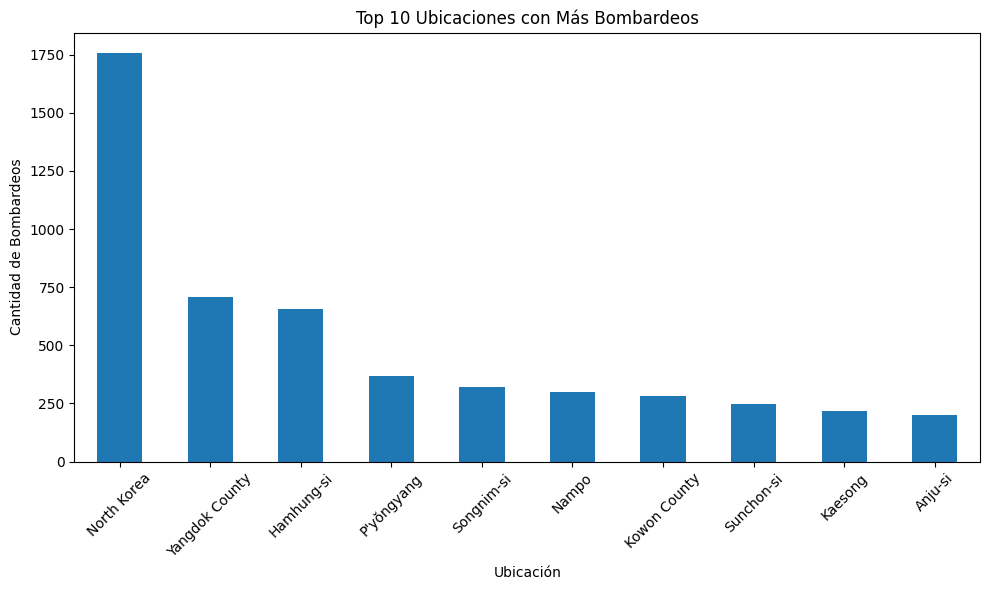

In [ ]:
bombing_stats.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Ubicaciones con Más Bombardeos")
plt.xlabel("Ubicación")
plt.ylabel("Cantidad de Bombardeos")
plt.xticks(rotation=45)
plt.tight_layout();                     # todo es Corea del Norte

In [265]:
unique_values = df_bombardeos_procesado_completo['City/Town'].unique()
unique_values.tolist()

['Changdo-ri',
 'North Korea',
 'Seosam-ri',
 'Anju-si',
 'Hamhung-si',
 'Pyongsan County',
 'Ushumun',
 'Green River Village',
 'Colonel Lee',
 'Hwacheon',
 'Baekrosanri',
 'Komsa-ri',
 'Sinseo-myeon',
 'Sangseo',
 'Jinhyeon-ri',
 'Bangsan-myeon',
 'Buk-myeon',
 'Mungyeong-si',
 'Geunnam-myeon',
 'Huichon-si',
 'Chongju-si',
 'Sentence Lee',
 'Kumya-up',
 'Jungnam-ri',
 'Dongsan Labor Union',
 'Kaesong',
 'Chojangri',
 'Songgan-up',
 'Gacheon-ri',
 'Sariwon-si',
 'Otan-ri',
 'Ryonghak-ri',
 'Seongsan-ri',
 'Jung-myeon',
 'Dong-myeon',
 'Seohwa-myeon',
 'Geundong-myeon',
 'Yanggu-eup',
 'Nampo',
 'Paju-si',
 'Reasonable price',
 'Paekhyon-ri',
 'Jeokdong-ri',
 'Cheonam-ri',
 'Pyonggang-up',
 'Haebang-ni',
 'Junggangri',
 'Junggang-ri',
 'Bokmanri',
 'Cheorwon-eup',
 'Jungsamri',
 'Seo-myeon',
 'Amjeong-ri',
 'Geoncheon-ri',
 'Apdong-ri',
 'Yangji-ri',
 'Daema-ri',
 'Dongsong-eup',
 'Lee Su-deok-ri',
 'Bokgye-ri',
 'Tomil-ri',
 'Large fish',
 'Tanchon-si',
 'Jungse-ri',
 'Okdong-ri',
 '

# 📊 **Patrones Identificados en los Bombardeos durante la Guerra de Corea**

## ✈️ **Patrones Estratégicos Identificados**

### 1. **Concentración en Corea del Norte**:
- 🟥 La mayoría de las ubicaciones bombardeadas pertenecen a **Corea del Norte**, incluyendo ciudades principales como **Pyongyang**, **Hamhung-si**, **Nampo**, y regiones industriales o logísticas como **Songnim-si** y **Kaesong**.
- 🔍 **Patrón**:
  - Corea del Norte fue el principal objetivo debido a su papel en el conflicto y la necesidad de debilitar sus capacidades militares e industriales.

---

### 2. **Bombardeos en Áreas Estratégicas**:
- 🏭 **Ciudades Industriales y Portuarias**:
  - Ciudades como **Nampo** y **Songnim-si** son puertos y centros industriales clave.
- 🚧 **Infraestructura Logística**:
  - Áreas como **Pyongsong-si** o **Kaesong**, ubicaciones cercanas a rutas de transporte importantes, reflejan un intento de interrumpir la logística enemiga.
- 🛡️ **Zonas Fronterizas**:
  - Áreas como **Kaesong** (cerca de la DMZ) sugieren operaciones para controlar territorios cercanos a Corea del Sur.

---

### 3. **Bombardeos en el Agua**:
- 🌊 **Cantidad de Bombardeos en el Agua**: 14 bombardeos etiquetados como `"Water"`.
- 📌 **Posibles Razones**:
  - Ataques contra objetivos navales o costas.
  - Bloqueo de suministros marítimos o ataque a bases navales.

---

### 4. **Áreas Repetidamente Bombardeadas**:
- 🔄 **Yangdok County** (706 bombardeos) y **Hamhung-si** (657 bombardeos):
  - **Yangdok County**: Importante por rutas logísticas.
  - **Hamhung-si**: Centro industrial clave.

---

## 🎯 **Estrategias y Objetivos Militares**

### 1. **Debilitar Capacidades Industriales y Logísticas**:
- 🏗️ Las ciudades más bombardeadas tenían importancia militar e industrial, reflejando un esfuerzo por destruir infraestructura esencial.

---

### 2. **Aislamiento Estratégico**:
- ✂️ Muchas áreas bombardeadas eran nodos logísticos clave, sugiriendo un esfuerzo por cortar el suministro de recursos y movimientos de tropas.

---

### 3. **Control de Zonas Urbanas y Portuarias**:
- 🚢 Bombardeos concentrados en ciudades portuarias como **Nampo** y **Songnim-si** indican intentos de controlar puntos de acceso marítimos.

---

## 🌾 **Impacto en Zonas Rurales**

### 1. **Bombardeos en Áreas de Baja Densidad**:
- 🏞️ Regiones rurales como **Yangdok County**, **Pyongsan County**, o **Sukchon County** también sufrieron ataques, probablemente para interrumpir el suministro agrícola o logístico.

---

### 2. **Distribución Ampliada**:
- 📍 Las ubicaciones menos bombardeadas (1-10 bombardeos) muestran la amplitud de las operaciones, cubriendo tanto objetivos estratégicos como tácticos.

---

## 📌 **Conclusiones**

### 1. **Prioridades del Conflicto**:
- La infraestructura militar, industrial y logística de Corea del Norte fue el principal objetivo.

---

### 2. **Estrategia Naval**:
- Los ataques en el agua sugieren un intento por controlar rutas marítimas y bloquear suministros.

---

### 3. **Amplitud del Conflicto**:
- Aunque los bombardeos se concentraron en áreas estratégicas, también alcanzaron muchas ubicaciones pequeñas, reflejando la magnitud del conflicto.

---

## 🔍 **Siguientes Pasos**

1. 🗺️ **Análisis Geoespacial**:
   - Representar las ubicaciones en un mapa para observar patrones geográficos más claramente.
2. 📆 **Estudio Cronológico**:
   - Analizar los bombardeos por fechas para identificar cambios en las estrategias a lo largo del tiempo.
3. 📈 **Relación con Resultados Militares**:
   - Vincular los bombardeos con los avances o retrocesos militares para entender su efectividad.

---
